<a href="https://colab.research.google.com/github/ArifAygun/Applied-Machine-Learning-Feature-Engineering/blob/main/AA_AML_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 03_01**

## Explore The Data: What Data Are We Using?

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read In Data

In [17]:
# Read in the data from the data folder
import pandas as pd

import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/Feature Engineering

titanic = pd.read_csv("titanic.csv")
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS/Feature Engineering


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check the number of rows and columns in the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check the type of data stored in each column
titanic.shape


(891, 12)

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# See the distribution of our target variable
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

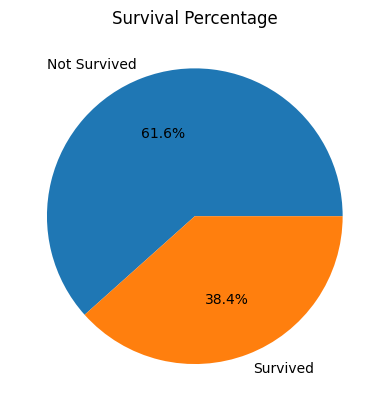

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset into a pandas dataframe
#titanic_df = pd.read_csv('titanic.csv')

# Create a pie chart of the "Survived" variable
survived_counts = titanic['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Percentage')
plt.show()


#**Part 03_02**

## Explore The Data: Explore Continuous Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read In Data

In [19]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore Continuous Features

In [20]:
# Look at the general distribution of these features
titanic.describe().T

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [22]:
# Look at the correlation matrix
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

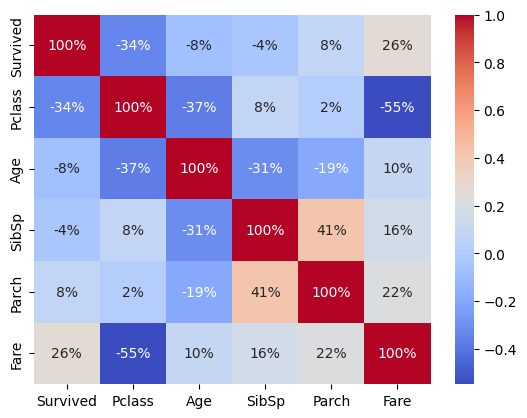

In [24]:
import seaborn as sns
import pandas as pd


# Compute the correlation matrix
corr_matrix = titanic.corr()

# Plot the correlation matrix using Seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.0%')


In [26]:
# Look at fare by different passenger class levels
titanic.groupby('Pclass')['Fare'].describe().T

Pclass,1,2,3
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


<Axes: xlabel='Pclass', ylabel='Fare'>

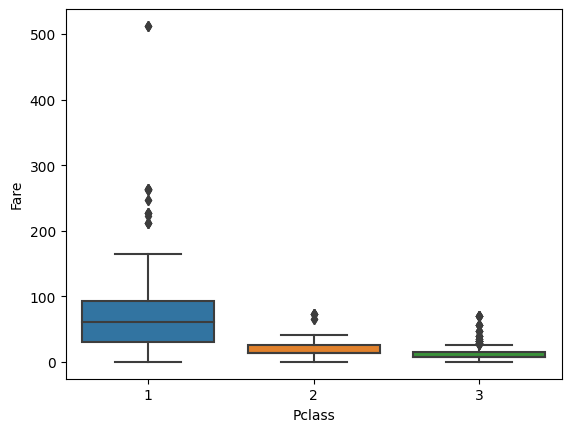

In [27]:
# Create a box plot of fare by passenger class level
sns.boxplot(x='Pclass', y='Fare', data=titanic)

In [ ]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(titanic.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = titanic[titanic['Survived']==1][feature]
    not_survived = titanic[titanic['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [ ]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)

In [ ]:
# Look at the average value of each feature based on whether Age is missing